In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

    
# Loop through all the cities in the list.
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | aparecida
Processing Record 7 of Set 1 | argentan
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | chalons-en-champagne
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | honiara
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | porto torres
Processing Record 20 of Set 1 | tunxi
City not found. Skipping...
Processing Record 21 of 

Processing Record 39 of Set 4 | narsaq
Processing Record 40 of Set 4 | prado
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | sambava
Processing Record 43 of Set 4 | proletarsk
Processing Record 44 of Set 4 | bowen
Processing Record 45 of Set 4 | henties bay
Processing Record 46 of Set 4 | berezovyy
Processing Record 47 of Set 4 | kloulklubed
Processing Record 48 of Set 4 | smithers
Processing Record 49 of Set 4 | doha
Processing Record 50 of Set 4 | mar del plata
Processing Record 1 of Set 5 | lhuntshi
City not found. Skipping...
Processing Record 2 of Set 5 | camacupa
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | mirandela
Processing Record 5 of Set 5 | menongue
Processing Record 6 of Set 5 | los llanos de aridane
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | price
Processing Record 9 of Set 5 | chokurdakh
Processing Record 10 of Set 5 | kodiak
Processing Record 11 of Set 5 | meulaboh
Processing Record 12 

Processing Record 24 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 25 of Set 8 | athabasca
Processing Record 26 of Set 8 | suda
Processing Record 27 of Set 8 | kruisfontein
Processing Record 28 of Set 8 | touros
Processing Record 29 of Set 8 | mahajanga
Processing Record 30 of Set 8 | haradok
Processing Record 31 of Set 8 | pisco
Processing Record 32 of Set 8 | hinton
Processing Record 33 of Set 8 | labuhan
Processing Record 34 of Set 8 | yabrud
Processing Record 35 of Set 8 | mormugao
Processing Record 36 of Set 8 | agde
Processing Record 37 of Set 8 | vrbove
Processing Record 38 of Set 8 | praya
Processing Record 39 of Set 8 | salym
Processing Record 40 of Set 8 | dingle
Processing Record 41 of Set 8 | pitimbu
Processing Record 42 of Set 8 | luorong
Processing Record 43 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 8 | chernushka
Processing Record 45 of Set 8 | marrakesh
Processing Record 46 of Set 8 | gravelbourg
Processi

Processing Record 10 of Set 12 | ouro preto do oeste
Processing Record 11 of Set 12 | penzance
Processing Record 12 of Set 12 | naftah
City not found. Skipping...
Processing Record 13 of Set 12 | bull savanna
Processing Record 14 of Set 12 | gardan diwal
City not found. Skipping...
Processing Record 15 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 16 of Set 12 | sandovo
Processing Record 17 of Set 12 | halifax
Processing Record 18 of Set 12 | nara
Processing Record 19 of Set 12 | podolinec
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | tura
Processing Record 22 of Set 12 | coolum beach
Processing Record 23 of Set 12 | namibe
Processing Record 24 of Set 12 | asyut
Processing Record 25 of Set 12 | saint-augustin
Processing Record 26 of Set 12 | bandarbeyla
Processing Record 27 of Set 12 | kaele
Processing Record 28 of Set 12 | shimoda
Processing Record 29 of Set 12 | barra dos coqueiros
Processing Record 30 of Set 12 | queanbeya

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2021-10-24 19:32:10,14.8961,-24.4956,78.98,69,42,9.35
1,Jamestown,US,2021-10-24 19:38:54,42.0970,-79.2353,54.99,83,90,3.00
2,Punta Arenas,CL,2021-10-24 19:39:18,-53.1500,-70.9167,46.51,36,75,21.85
3,Aparecida,BR,2021-10-24 19:42:03,-22.8469,-45.2297,80.10,69,75,4.61
4,Argentan,FR,2021-10-24 19:42:04,48.7500,-0.0167,55.17,87,69,7.47
5,Clyde River,CA,2021-10-24 19:31:58,70.4692,-68.5914,12.15,80,65,4.18
6,Butaritari,KI,2021-10-24 19:32:16,3.0707,172.7902,80.20,71,2,2.66
7,Ushuaia,AR,2021-10-24 19:40:32,-54.8000,-68.3000,33.46,80,75,39.12
8,Barrow,US,2021-10-24 19:42:05,71.2906,-156.7887,28.42,80,90,5.75
9,Bluff,NZ,2021-10-24 19:42:05,-46.6000,168.3333,52.86,92,92,5.99


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Sao Filipe,CV,2021-10-24 19:32:10,14.8961,-24.4956,78.98,69,42,9.35
1,1,Jamestown,US,2021-10-24 19:38:54,42.0970,-79.2353,54.99,83,90,3.00
2,2,Punta Arenas,CL,2021-10-24 19:39:18,-53.1500,-70.9167,46.51,36,75,21.85
3,3,Aparecida,BR,2021-10-24 19:42:03,-22.8469,-45.2297,80.10,69,75,4.61
4,4,Argentan,FR,2021-10-24 19:42:04,48.7500,-0.0167,55.17,87,69,7.47
...,...,...,...,...,...,...,...,...,...,...
554,554,Baghdad,IQ,2021-10-24 19:40:46,33.3406,44.4009,66.11,32,0,4.61
555,555,Porbandar,IN,2021-10-24 19:45:43,21.6422,69.6093,79.14,64,0,8.08
556,556,Ust-Kuyga,RU,2021-10-24 19:45:43,70.0167,135.6000,3.61,97,100,1.83
557,557,Lampa,CL,2021-10-24 19:45:44,-33.2833,-70.9000,81.43,14,0,12.66


In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1635104747.4700391

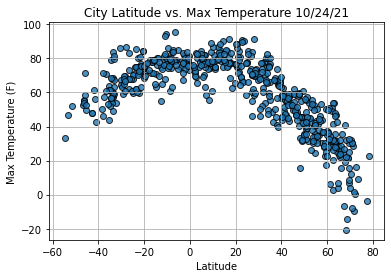

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

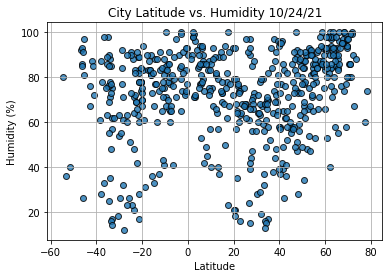

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

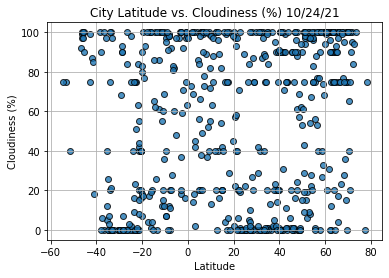

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

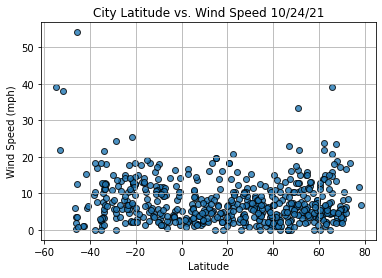

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                     Saldanha
Country                        ZA
Date          2021-10-24 19:32:37
Lat                      -33.0117
Lng                       17.9442
Max Temp                    59.05
Humidity                       75
Cloudiness                      0
Wind Speed                   18.1
Name: 13, dtype: object

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Sao Filipe,CV,2021-10-24 19:32:10,14.8961,-24.4956,78.98,69,42,9.35
1,1,Jamestown,US,2021-10-24 19:38:54,42.0970,-79.2353,54.99,83,90,3.00
4,4,Argentan,FR,2021-10-24 19:42:04,48.7500,-0.0167,55.17,87,69,7.47
5,5,Clyde River,CA,2021-10-24 19:31:58,70.4692,-68.5914,12.15,80,65,4.18
6,6,Butaritari,KI,2021-10-24 19:32:16,3.0707,172.7902,80.20,71,2,2.66


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

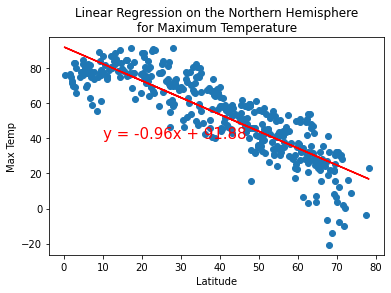

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'+'\n'+
                       'for Maximum Temperature', 'Max Temp',(10,40))

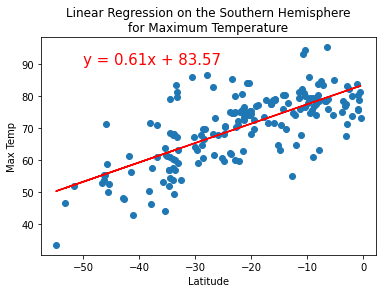

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+'\n'+
                        'for Maximum Temperature', 'Max Temp',(-50,90))

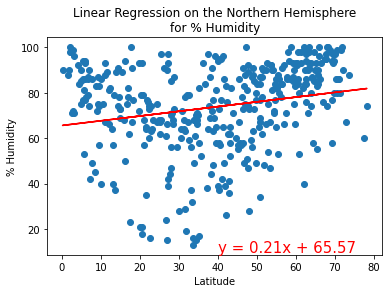

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'+'\n'
                        'for % Humidity', '% Humidity',(40,10))

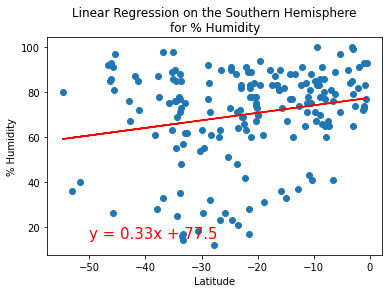

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+ '\n'
                        'for % Humidity', '% Humidity',(-50,15))

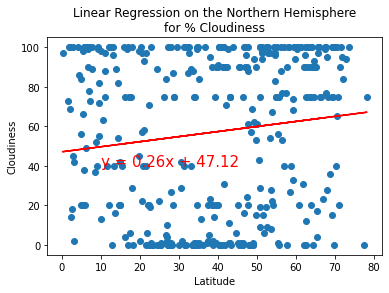

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'+'\n'
                        'for % Cloudiness', 'Cloudiness',(10,40))

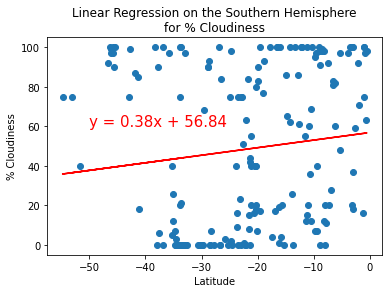

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+'\n'+
                        'for % Cloudiness', '% Cloudiness',(-50,60))

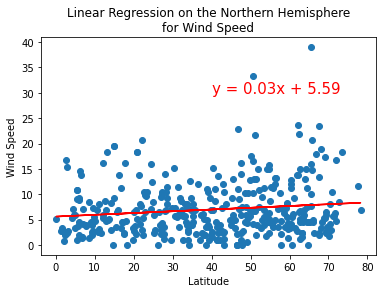

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'+'\n'+
                        'for Wind Speed', 'Wind Speed',(40,30))

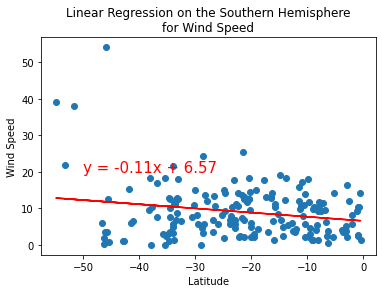

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+'\n'+
                        'for Wind Speed', 'Wind Speed',(-50,20))